# Clustering a Mall's Customers in Different Groups

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [8]:
data = pd.read_csv('Mall_Customers.csv')
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
data.rename(index=str, columns={'Annual Income (k$)':'Income',
                               'Spending Score (1-100)': 'Score'}, inplace=True)
data.head(10)

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Preprocessing

In [11]:
mapping = {'Male':0, 'Female':1}
data['Gender'] = data['Gender'].map(mapping)
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## Finding the Correlation
#### As you can see, Gender doesn't have any particular effect on dataset and is so distributed

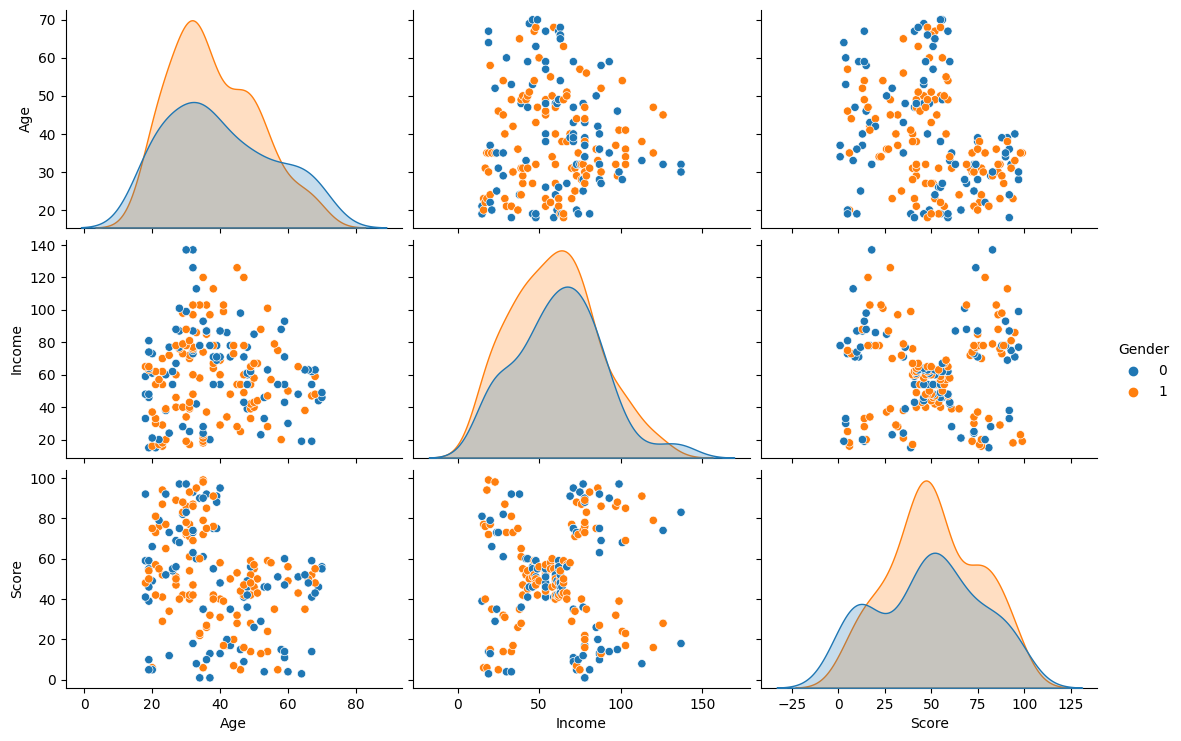

In [15]:
import seaborn as sns

D = data.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

### Turning the dataset into a numpy array and scaling it

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.iloc[:,2:].values
X = scaler.fit_transform(X)
X

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

## Modeling the dataset with KMeans algorithm

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

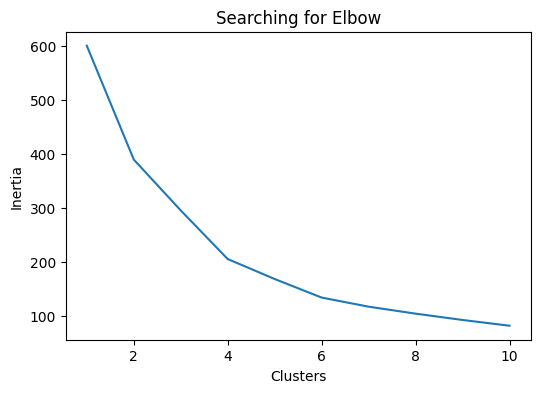

In [26]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1,11):
    km = KMeans(n_clusters = i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


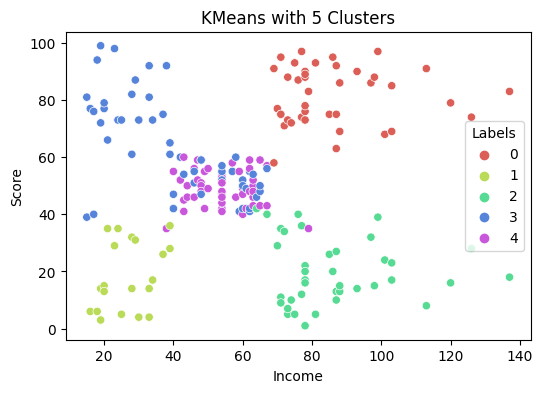

In [27]:
km5 = KMeans(n_clusters=5).fit(X)

data['Labels'] = km5.labels_
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

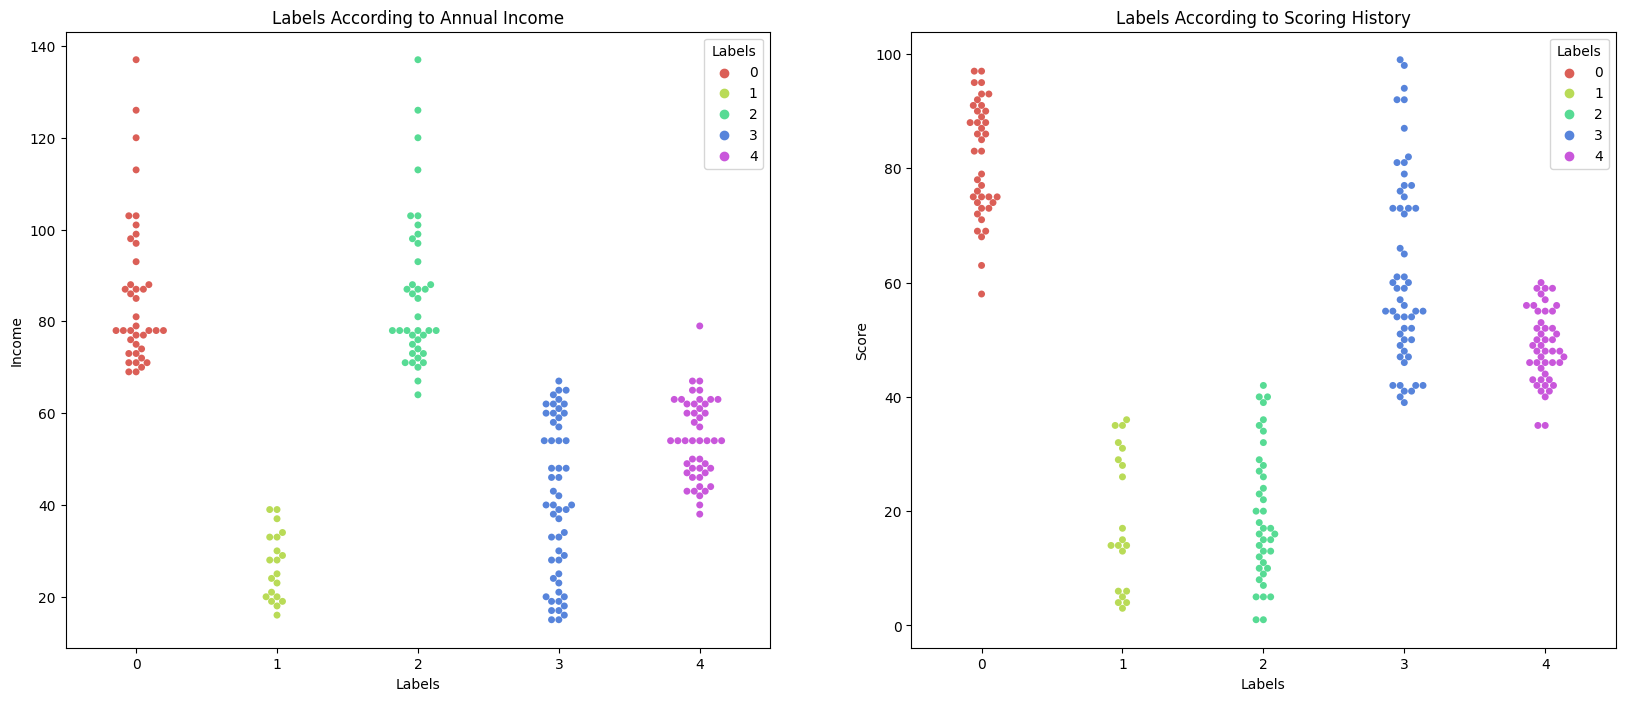

In [33]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=data, ax=ax, hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=data, ax=ax, hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Scoring History')

plt.show()

## Modeling the dataset with Hierarchical Clustering

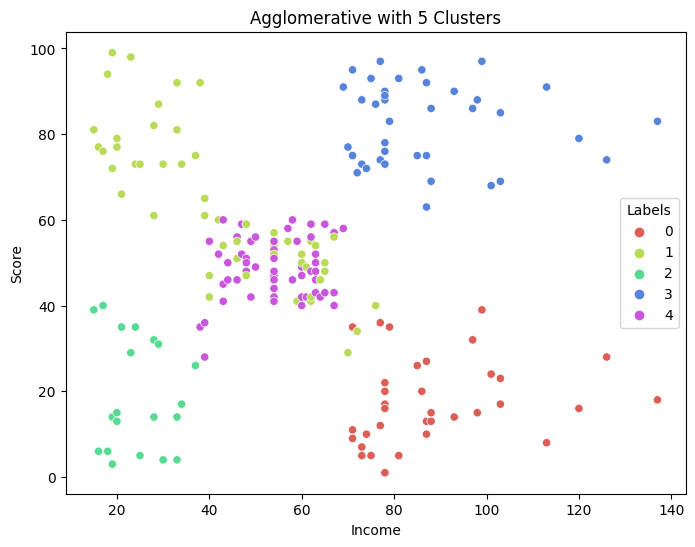

In [52]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

data['Labels'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

In [37]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)

[[0.         1.63681098 1.28368768 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         2.91275149 ... 4.3182849  5.31878915 4.70189264]
 [1.28368768 2.91275149 0.         ... 5.03379713 4.72114828 5.54808733]
 ...
 [4.54611614 4.3182849  5.03379713 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 4.72114828 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.54808733 ... 0.5647686  2.5274803  0.        ]]


C:\Users\saeid.habibi\AppData\Local\Temp\ipykernel_12984\1507831387.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist, 'average')


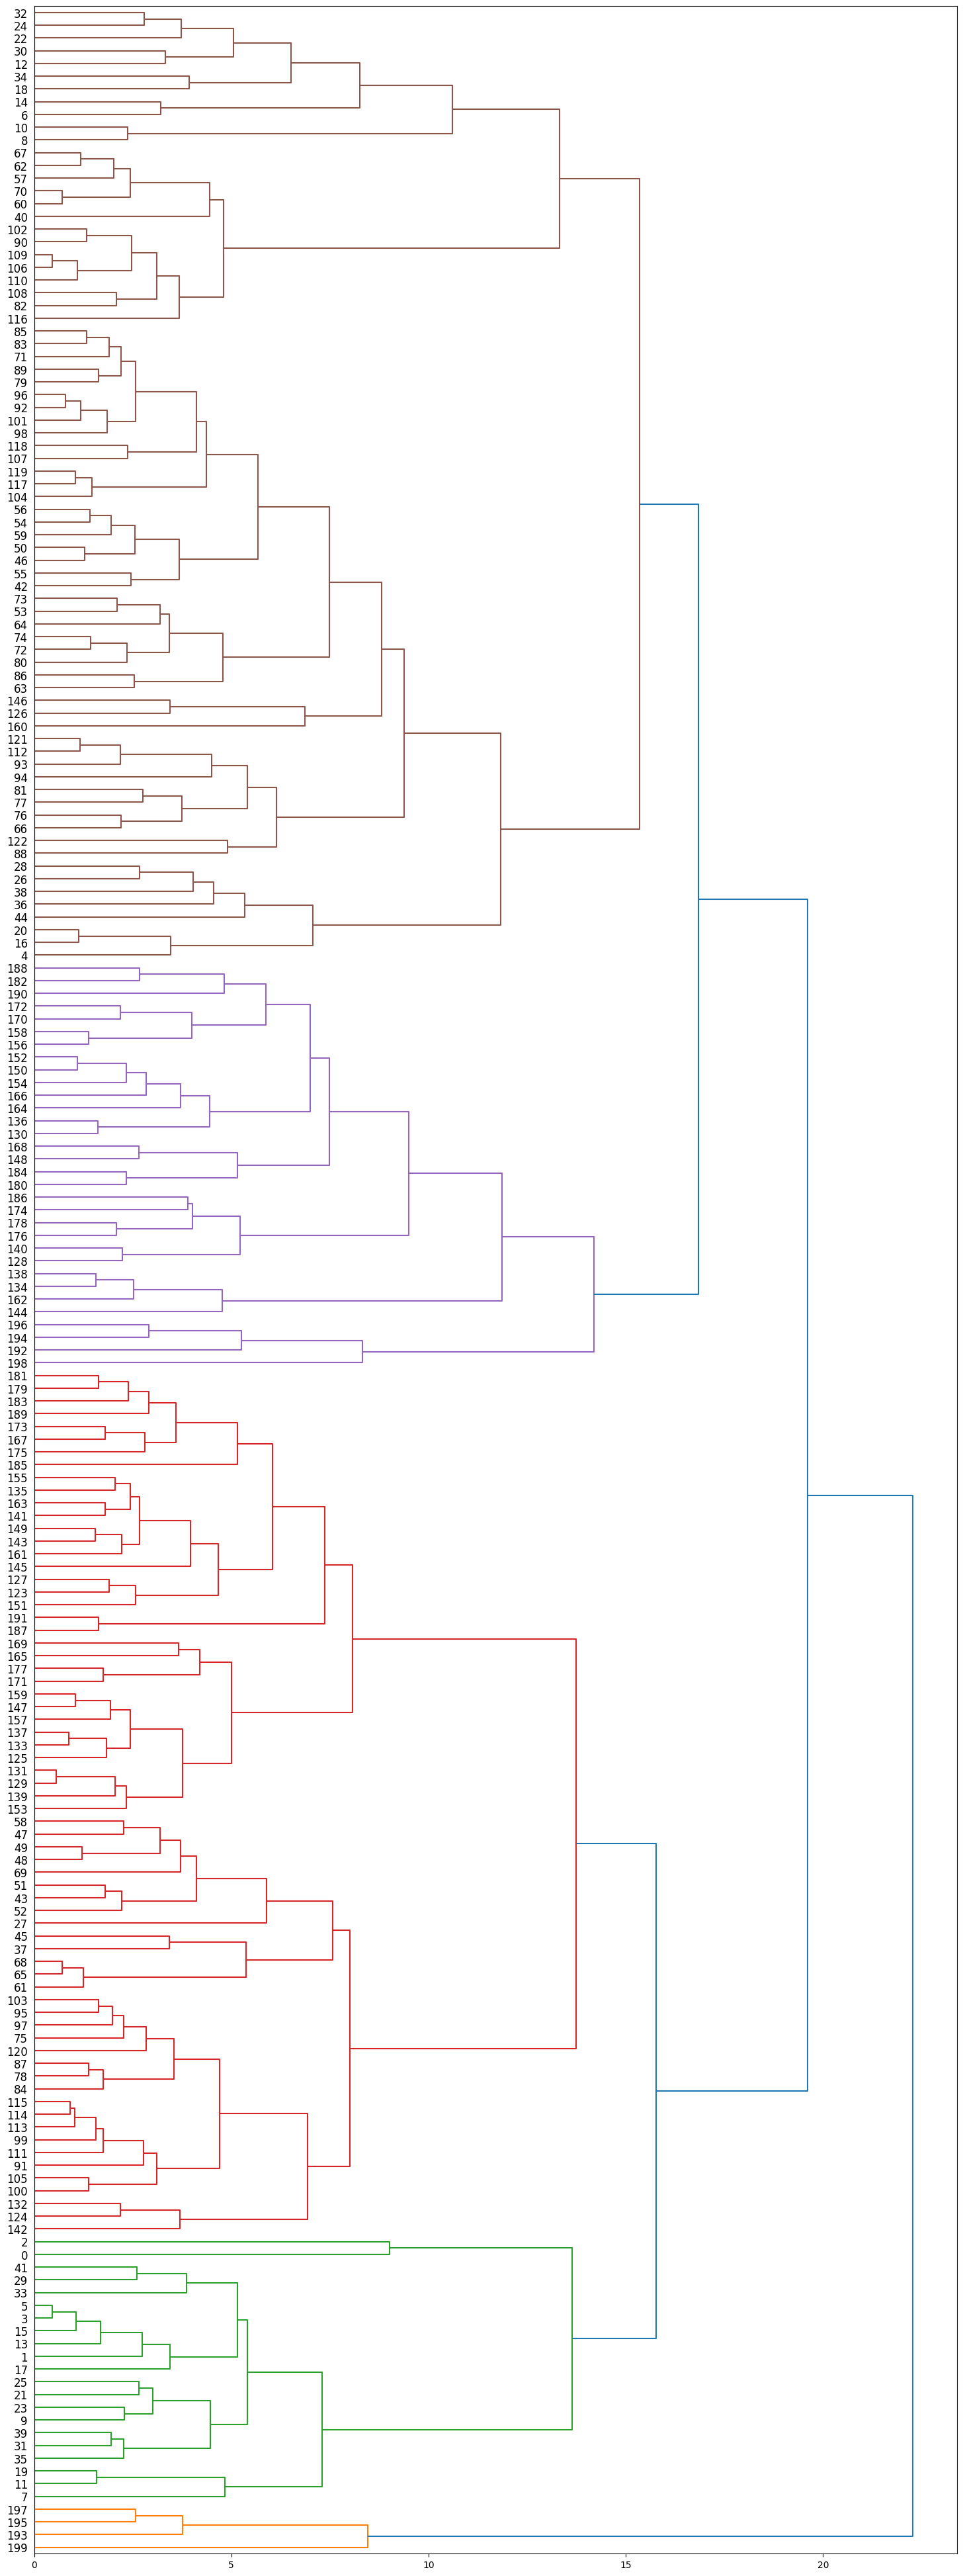

In [53]:
Z = hierarchy.linkage(dist, 'average')

plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

### For DBSCAN, we need a unscaled data, otherwise DBSCAN would cluster the whole dataset in one cluster automatically

In [55]:
unscaled_X = data.iloc[:,2:].values
unscaled_X

array([[ 19,  15,  39,   2],
       [ 21,  15,  81,   1],
       [ 20,  16,   6,   2],
       [ 23,  16,  77,   1],
       [ 31,  17,  40,   2],
       [ 22,  17,  76,   1],
       [ 35,  18,   6,   2],
       [ 23,  18,  94,   1],
       [ 64,  19,   3,   2],
       [ 30,  19,  72,   1],
       [ 67,  19,  14,   2],
       [ 35,  19,  99,   1],
       [ 58,  20,  15,   2],
       [ 24,  20,  77,   1],
       [ 37,  20,  13,   2],
       [ 22,  20,  79,   1],
       [ 35,  21,  35,   2],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   2],
       [ 35,  23,  98,   1],
       [ 35,  24,  35,   2],
       [ 25,  24,  73,   1],
       [ 46,  25,   5,   2],
       [ 31,  25,  73,   1],
       [ 54,  28,  14,   2],
       [ 29,  28,  82,   1],
       [ 45,  28,  32,   2],
       [ 35,  28,  61,   1],
       [ 40,  29,  31,   2],
       [ 23,  29,  87,   1],
       [ 60,  30,   4,   2],
       [ 21,  30,  73,   1],
       [ 53,  33,   4,   2],
       [ 18,  33,  92,   1],
       [ 49,  

## Modeling the dataset with DBSCAN

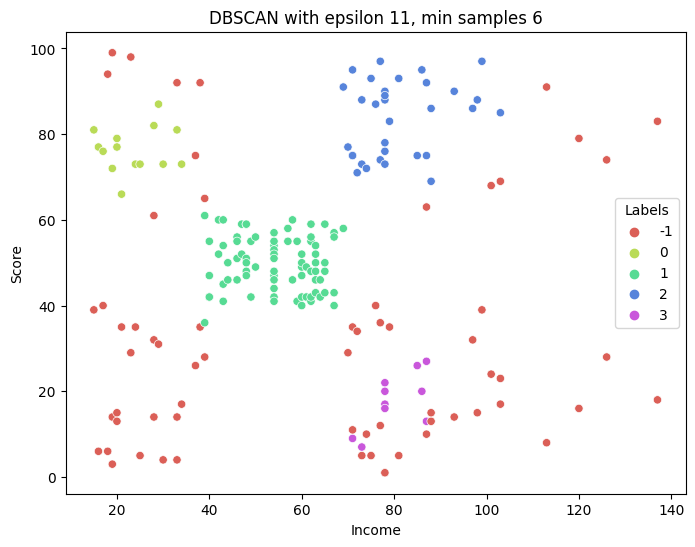

In [58]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(unscaled_X)

data['Labels'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

# Wrap all we have done in one place!

C:\Users\saeid.habibi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'DBSCAN with epsilon 11, min samples 6')

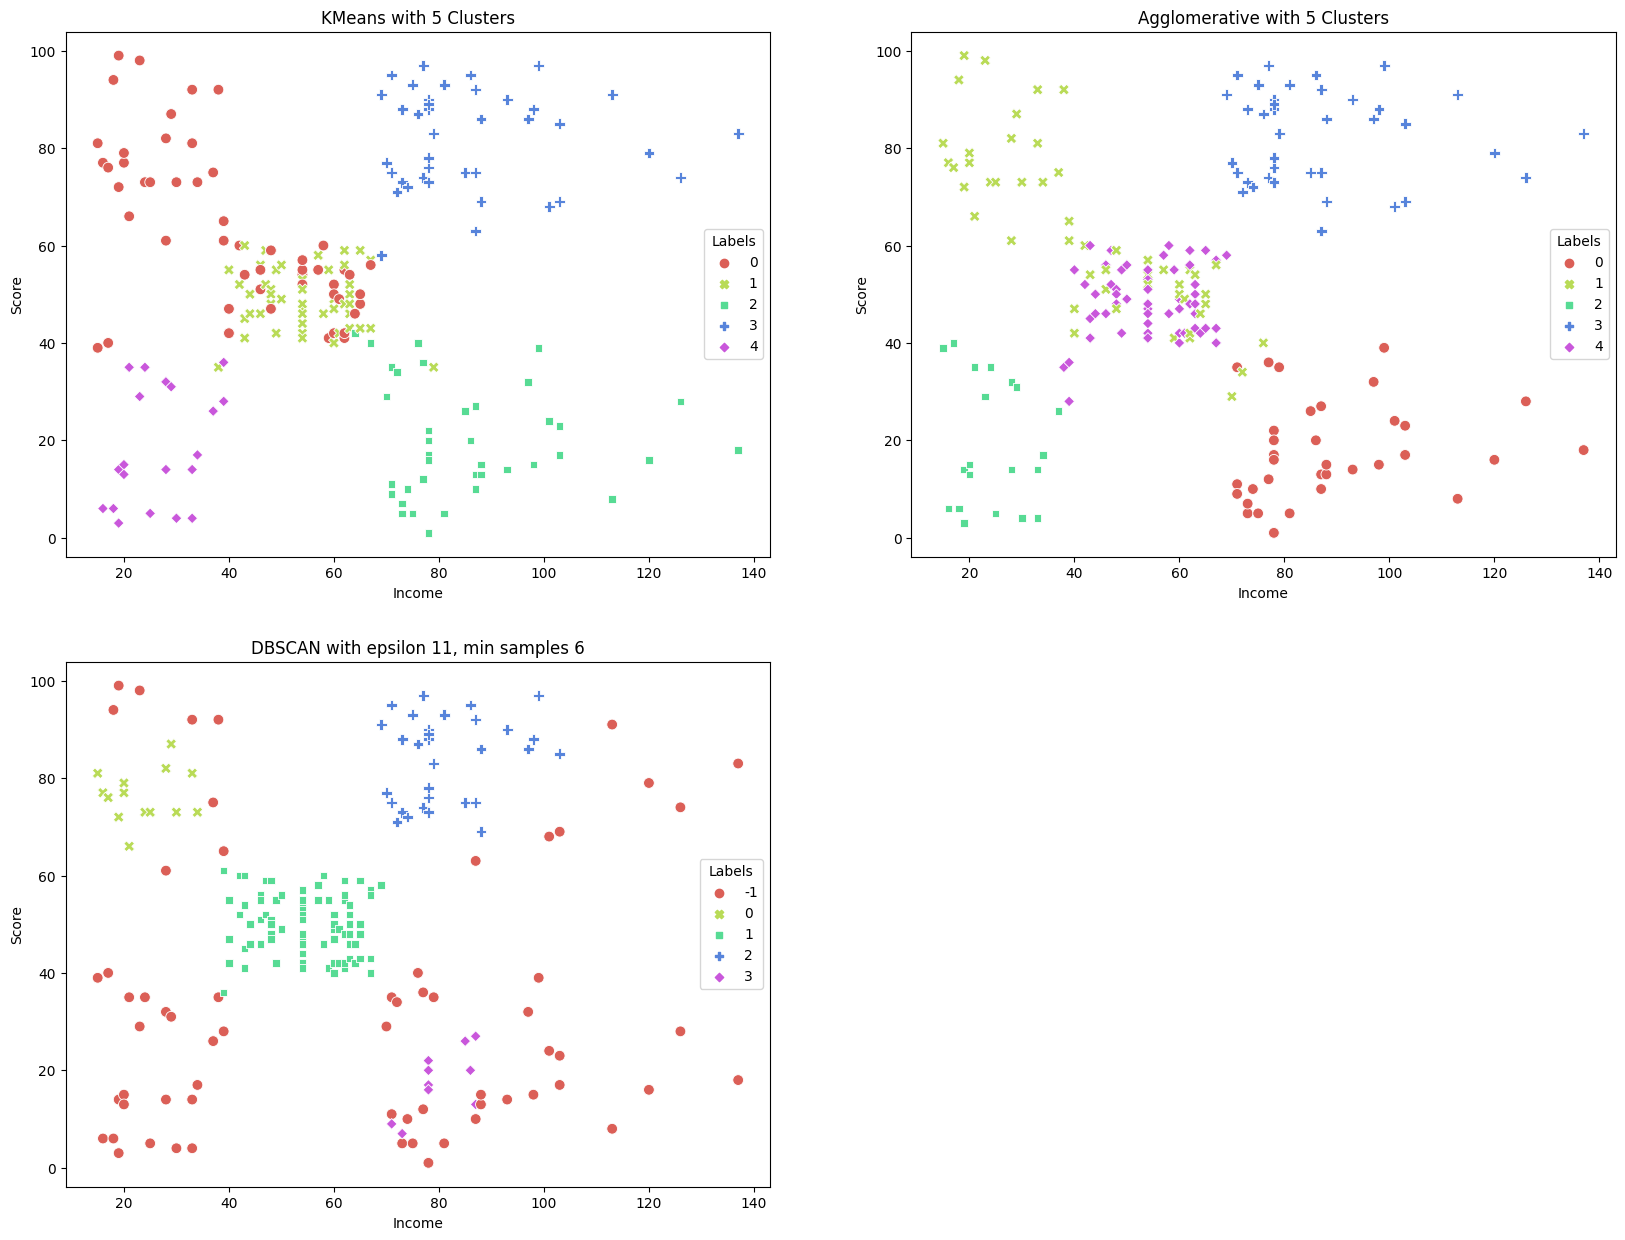

In [64]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
data['Labels'] = km5.labels_
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Labels'], style=data['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
data['Labels'] = agglom.labels_
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Labels'], style=data['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(unscaled_X)
data['Labels'] = db.labels_
sns.scatterplot(x=data['Income'], y=data['Score'], hue=data['Labels'], style=data['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')